In [50]:
import pandas as pd
import os

n_features = 127 # number of features

# Concrete
concrete_dir = 'data/variational_experiment/sparse/concrete'
concrete_files = sorted(os.listdir(concrete_dir))
concrete_dfs = list(map(lambda x: pd.read_csv(os.path.join(concrete_dir, x), index_col=0), concrete_files))


# Variational
variationaĺ_dir = 'data/variational_experiment/sparse/variational'
variational_files = sorted(os.listdir(variationaĺ_dir))
variational_dfs = list(map(lambda x: pd.read_csv(os.path.join(variationaĺ_dir, x), index_col=0), variational_files))


In [110]:
import numpy as np

def moving_average(a:np.ndarray, n=3, padding_size=2):
    ''' 
        Moving average filter for 1-D array. 

        TODO:
            - HySpecLab integration
            - Scikit-Learn interface

        Parameters
        ----------
        a : 1-D array, shape (batch_size, n_features)
            Input array.
        n : int, optional
            Window size. Default is 3.
        padding_size : int, optional
            Padding size. Default is 2.
    
    '''
    if padding_size > 0:
        a = np.pad(a, ((0,0), (padding_size//2, padding_size//2)), 'edge')

    ret = np.cumsum(a, axis=1, dtype=float)
    ret[:, n:] = ret[:, n:] - ret[:, :-n]
    return ret[:, n - 1:] / n

preparing data...

In [128]:
data_dfs = [concrete_dfs, variational_dfs]
names = ['Concrete Dropout', 'Variational Dropout']

data = dict()

for dfs, name in zip(data_dfs, names):
    X = []
    for df in dfs:
        X.append(df['Value'].values)

    X = np.stack(X)
    X = moving_average(X, n=5, padding_size=4) / n_features
    data[name] = X

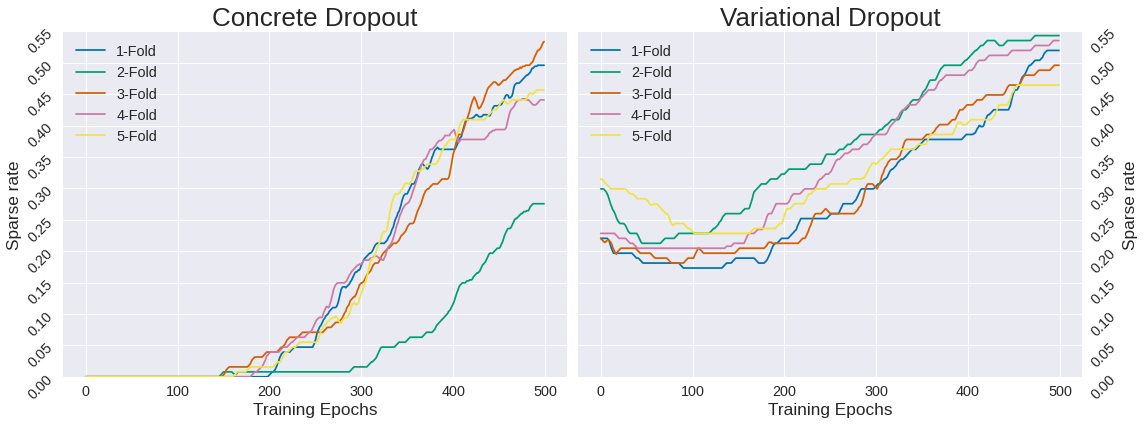

In [141]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-colorblind')
legend = list(map(lambda x: '{}-Fold'.format(x+1), range(len(concrete_dfs))))

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

for idx, name in enumerate(data.keys()):
    x = data[name]
    ax[idx].set_title(name, fontsize=26)
    ax[idx].plot(x.T, label=legend)

    if idx == 1:
        #set y ticks and y label to the rigth
        ax[idx].yaxis.tick_right()
        ax[idx].yaxis.set_label_position("right")

    y_ticks = np.arange(0, .56, .05)
    ax[idx].set_yticks(y_ticks)
    ax[idx].set_yticklabels(np.char.mod('%.2f', y_ticks), rotation=45)
    ax[idx].grid(True)


    ax[idx].set_xlabel('Training Epochs', fontsize='xx-large')
    ax[idx].set_ylabel('Sparse rate', fontsize='xx-large')
    ax[idx].tick_params(labelsize='x-large')
    ax[idx].legend(fontsize='x-large')
    ax[idx].set_ylim(0, .55)

fig.tight_layout()
plt.show()

# save as png and pdf
fig.savefig('sparse_rate.png', dpi=300)
fig.savefig('sparse_rate.pdf')